<a href="https://colab.research.google.com/github/MrJenish/woc5.0-ml-weather-prediction-case-study-Jenish-Mangukiya/blob/main/WOC5_0_ML_Mid_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import python library**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Collecting Data**

Read csv data file

In [2]:
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")

### **Analysis Data file**

In [3]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [4]:
weather.shape

(1461, 5)

In [5]:
weather.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


See the dependency between different data features

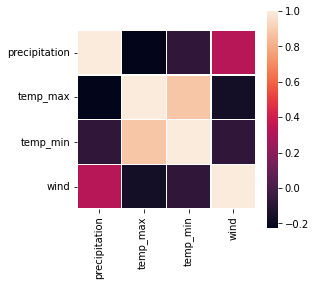

In [7]:
plt.figure(figsize=(4,4))
sns.heatmap(weather.corr(),square=True,lw=0.2)

From the following bar plot we can see that most of the days weather is rain and sun

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


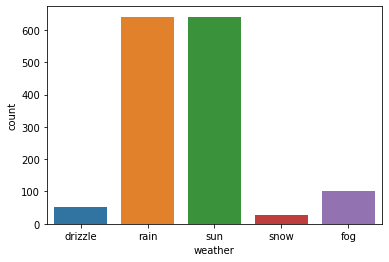

In [8]:
sns.countplot(weather.weather)

In [9]:
weather.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

Analyze that weather in terms of percentage %

In [10]:
print("weather in the percentage %")
weather.weather.value_counts()/len(weather) * 100

weather in the percentage %


rain       43.874059
sun        43.805613
fog         6.913073
drizzle     3.627652
snow        1.779603
Name: weather, dtype: float64

From the following figure we can see that minimum temperature and max temperature are linearly dependent 

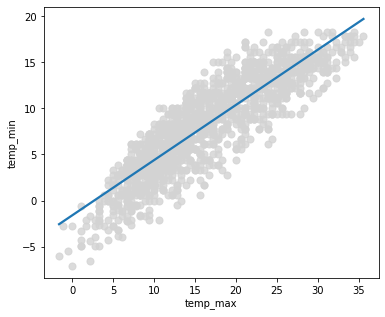

In [11]:
plt.figure(figsize=(6,5))
sns.regplot(x='temp_max',y='temp_min',data=weather,
            ci=None,
            scatter_kws={'s': 50, 'alpha': 0.8, 'color': 'lightgray'})

Here is the scatter plot between wind and weather

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


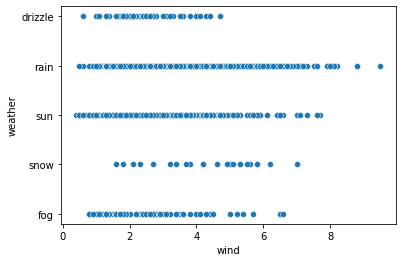

In [12]:
sns.scatterplot('wind','weather',data=weather)

From the following box plot we can analyze that how much data lies within which range

We can see that in precipitation and wind columns lots of outliers

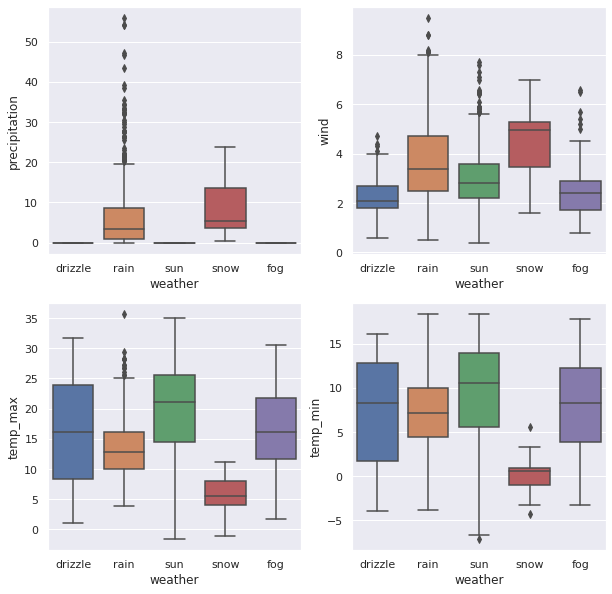

In [13]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='weather',y='precipitation',ax=axs[0,0],data=weather)
sns.boxplot(x='weather',y='wind',ax=axs[0,1],data=weather)
sns.boxplot(x='weather',y='temp_max',ax=axs[1,0],data=weather)
sns.boxplot(x='weather',y='temp_min',ax=axs[1,1],data=weather)

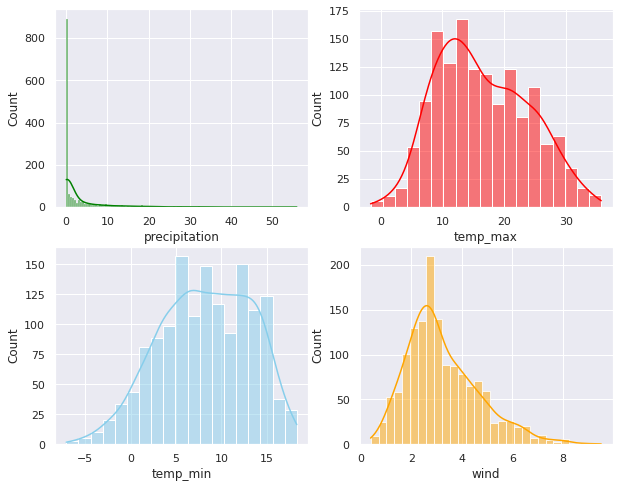

In [14]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather,x="wind",kde=True,ax=axs[1,1],color='orange')

**Import some useful library for train and test our model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### **First Model**

In the first model we simply build the data without any preprocessing on the data

In [16]:
input1 = weather.drop(['weather'],axis=1)
output1 = weather.weather

In [17]:
input1.shape

(1461, 4)

In [18]:
output1.shape

(1461,)

In [19]:
output1.replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4],inplace=True)

In [20]:
output1.value_counts()

1    641
2    640
4    101
0     53
3     26
Name: weather, dtype: int64

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(input1,output1,test_size=0.2,random_state=42)

In [22]:
print('x_train1 size : ',str(x_train1.shape))
print('x_test1 size : ',str(x_test1.shape))
print('y_train1 size : ',str(y_train1.shape))
print('y_test1 size : ',str(y_test1.shape))

x_train1 size :  (1168, 4)
x_test1 size :  (293, 4)
y_train1 size :  (1168,)
y_test1 size :  (293,)


In [23]:
model1 = LogisticRegression()

In [24]:
model1.fit(x_train1,y_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
print("Accuracy of third model : {:.2f}%".format(model1.score(x_test1,y_test1)*100))

Accuracy of third model : 83.28%


### **Model2**

In the second model we scale the data so that it will helpfull for train our model

In [26]:
input2 = weather.drop(['weather'],axis=1)
output2 = weather.weather

In [27]:
input2.shape

(1461, 4)

In [28]:
output2.shape

(1461,)

In [29]:
output2.replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4],inplace=True)

In [30]:
output2.value_counts()

1    641
2    640
4    101
0     53
3     26
Name: weather, dtype: int64

In [31]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(input2,output2,test_size=0.2,random_state=42)

In [32]:
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [33]:
print('x_train2 size : ',str(x_train2.shape))
print('x_test2 size : ',str(x_test2.shape))
print('y_train2 size : ',str(y_train2.shape))
print('y_test2 size : ',str(y_test2.shape))

x_train2 size :  (1168, 4)
x_test2 size :  (293, 4)
y_train2 size :  (1168,)
y_test2 size :  (293,)


In [34]:
model2 = LogisticRegression()

In [35]:
model2.fit(x_train2,y_train2)

LogisticRegression()

In [36]:
print("Accuracy of second model : {:.2f}%".format(model2.score(x_test2,y_test2)*100))

Accuracy of second model : 77.82%


### **Model 3**

In the third model, first we remove outliners and then scale the data so that it will helpfull for train our model

In [37]:
Q1=weather.quantile(0.25)
Q3=weather.quantile(0.75)
IQR=Q3-Q1
weather=weather[~((weather<(Q1-1.5*IQR))|(weather>(Q3+1.5*IQR))).any(axis=1)]

In [38]:
weather.shape

(1132, 5)

In [39]:
weather.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,0.853887,17.208216,8.478357,3.035777,1.537102
std,1.618465,7.614239,5.187085,1.212877,0.604611
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,11.100000,4.400000,2.200000,1.000000
50%,0.000000,16.700000,8.900000,2.800000,2.000000
75%,1.000000,23.300000,12.800000,3.800000,2.000000
max,6.900000,35.600000,18.300000,6.600000,3.000000


Here we can see that after remove the outliers how our data look like

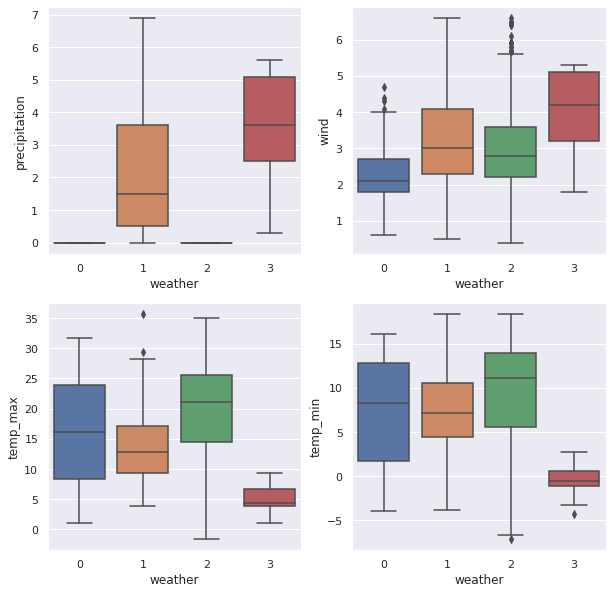

In [40]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='weather',y='precipitation',ax=axs[0,0],data=weather)
sns.boxplot(x='weather',y='wind',ax=axs[0,1],data=weather)
sns.boxplot(x='weather',y='temp_max',ax=axs[1,0],data=weather)
sns.boxplot(x='weather',y='temp_min',ax=axs[1,1],data=weather)

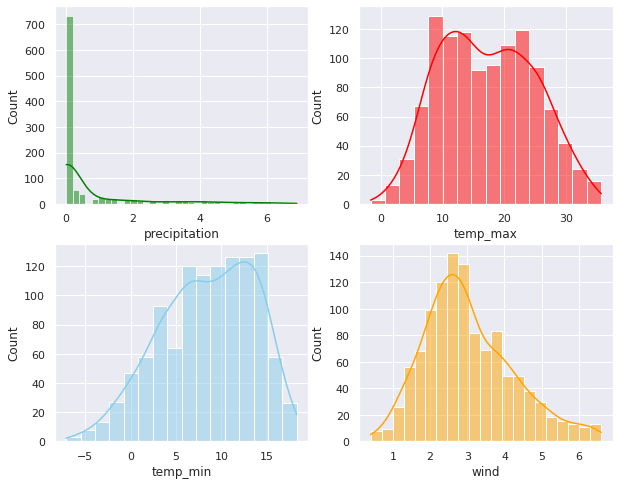

In [41]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather,x="wind",kde=True,ax=axs[1,1],color='orange')

In [42]:
input3 = weather.drop(['weather'],axis=1)
output3 = weather.weather

In [43]:
input3.shape

(1132, 4)

In [44]:
output3.shape

(1132,)

In [45]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(input3,output3,test_size=0.2,random_state=42)

In [46]:
print('x_train3 size : ',str(x_train3.shape))
print('x_test3 size : ',str(x_test3.shape))
print('y_train3 size : ',str(y_train3.shape))
print('y_test3 size : ',str(y_test3.shape))

x_train3 size :  (905, 4)
x_test3 size :  (227, 4)
y_train3 size :  (905,)
y_test3 size :  (227,)


In [47]:
model3 = LogisticRegression()

In [48]:
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train3)
x_test3 = sc.transform(x_test3)

In [49]:
model3.fit(x_train3,y_train3)

LogisticRegression()

In [50]:
print("Accuracy of third model : {:.2f}%".format(model3.score(x_test3,y_test3)*100))

Accuracy of third model : 86.78%


In [51]:
def predictWeather(x):
  predictedWeather = model3.predict(x)
  if predictedWeather==0:
    return "Drizzle"
  if predictedWeather==1:
    return "Rain"
  if predictedWeather==2:
    return "Sun"
  if predictedWeather==3:
    return "Snow"
  if predictedWeather==4:
    return "Fog"

Check the model by giving some input value

In [52]:
userInput = [[1,7,2.5,2.3]]
print("Today's weather is " + predictWeather(userInput))

Today's weather is Rain


**From the above three model we can see that**


1.   First model accurancy : 83.28 %
2.   Second model accurancy : 77.82 %
3.   Third model accurancy : 86.78 %

